In [1]:
from audIBle.src.apnet import APNet
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)


cpu


In [2]:
model = APNet(n_prototypes=20)
x = torch.randn([32, 1, 44100*5]).to(device)
print(x.shape)
model.to(device)
model.eval()
with torch.no_grad():
    y, x_hat, dist, spec, z = model(x, return_all=True)
    proto = model.get_prototypes()
print(f"{x.shape=}")
print(f"{spec.shape=}")
print(f"{x_hat.shape=}")
print(f"{z.shape=}")
print(f"{y.shape=}")
print(f"{dist.shape=}")
print(f"{proto.shape=}")

ntime=216
torch.Size([32, 1, 220500])
x.shape=torch.Size([32, 1, 220500])
spec.shape=torch.Size([32, 256, 216])
x_hat.shape=torch.Size([32, 256, 216])
z.shape=torch.Size([32, 256, 64, 54])
y.shape=torch.Size([32, 10])
dist.shape=torch.Size([32, 20, 64])
proto.shape=torch.Size([20, 256, 64, 54])


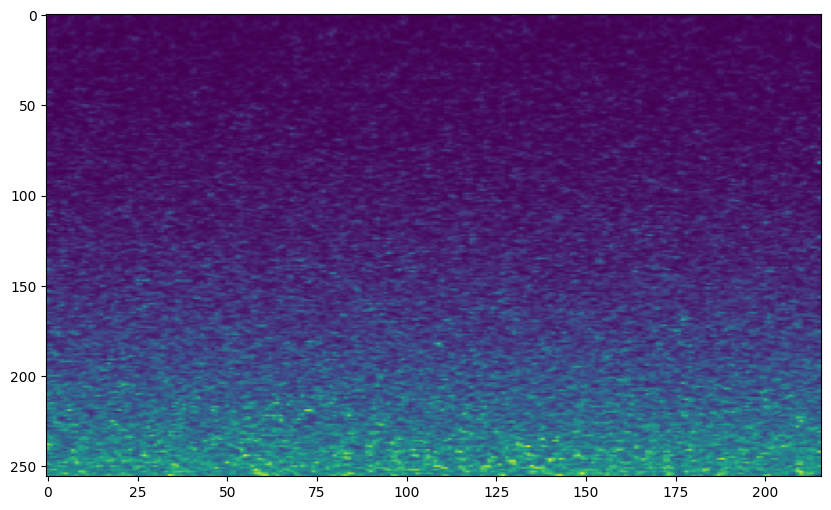

In [10]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.imshow(spec[0].cpu().numpy(), aspect='auto')
plt.show()

In [ ]:
from audIBle.data.datasets import ESC_50
root = "/lium/corpus/vrac/tmario/"
dataset = ESC_50(root=root,part="train")


KeyboardInterrupt: 

In [ ]:
from torch.utils.data import DataLoader

model.to(device)
train_loader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=4)
import torchaudio.transforms as T
resample = T.Resample(orig_freq=44100, new_freq=22500)

spec = T.MelSpectrogram(n_fft=4096, win_length=4096, hop_length=1024,sample_rate=44100, n_mels=256)
for i, (x, y) in enumerate(train_loader):
    print(x.shape)
    print(y.shape)
    x = spec(x)
    print(x.shape)
    y = model(x.to(device))

torch.Size([32, 1, 220500])
torch.Size([32])
torch.Size([32, 1, 256, 216])


RuntimeError: Given transposed=1, weight of size [64, 128, 3, 3], expected input[32, 256, 64, 54] to have 64 channels, but got 256 channels instead